In [62]:
# Exploratory Data Analysis(EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale = 2)
data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/'
                    'hands-on-exploratory-data-analysis-with-python/'
                    'master/Chapter%207/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

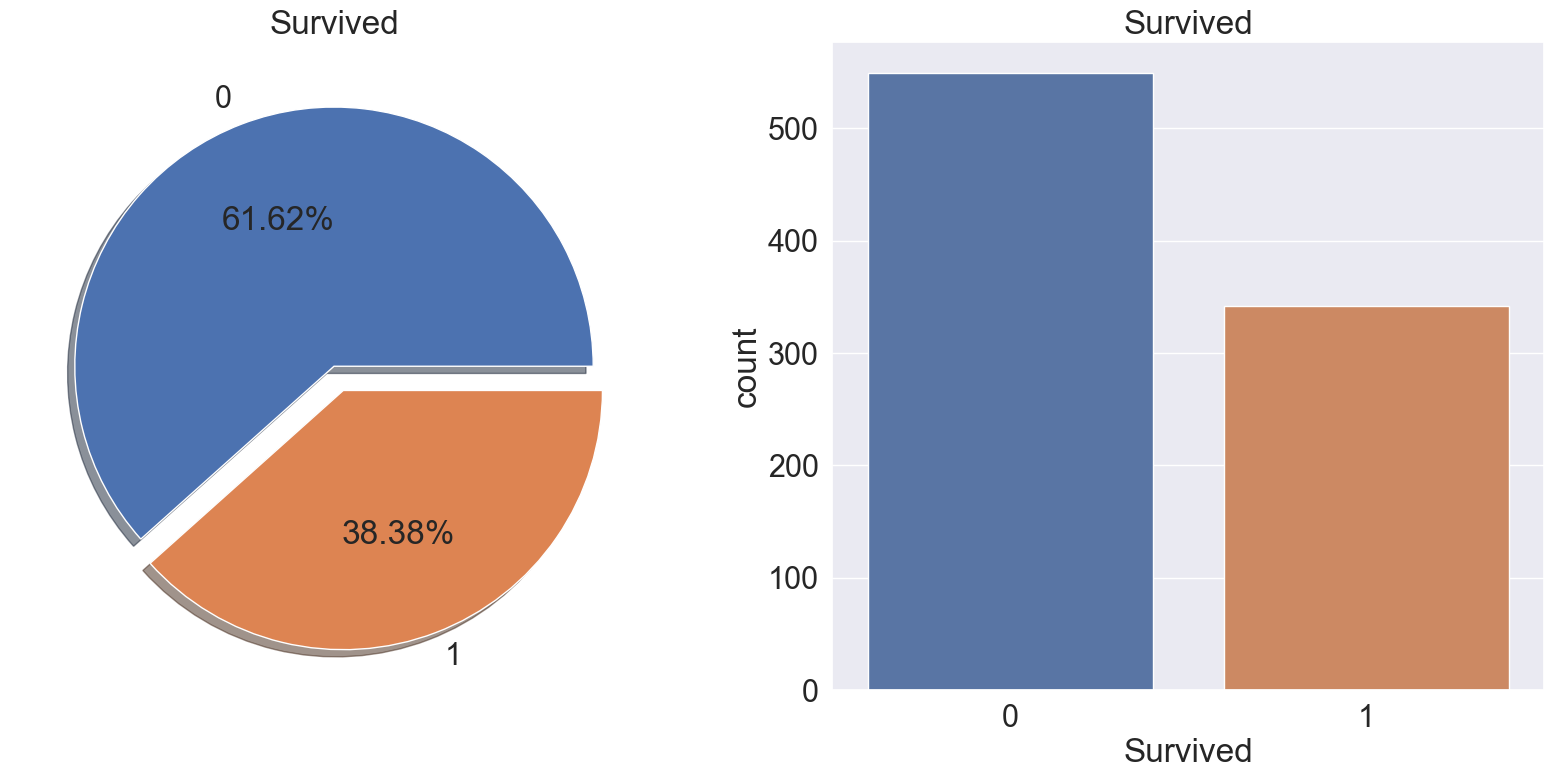

In [64]:
# 1행 2열 18-8크기의 figure를 생성
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                        autopct = '%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [65]:
# 특징들 분석

# Sex -> categorical Feature

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

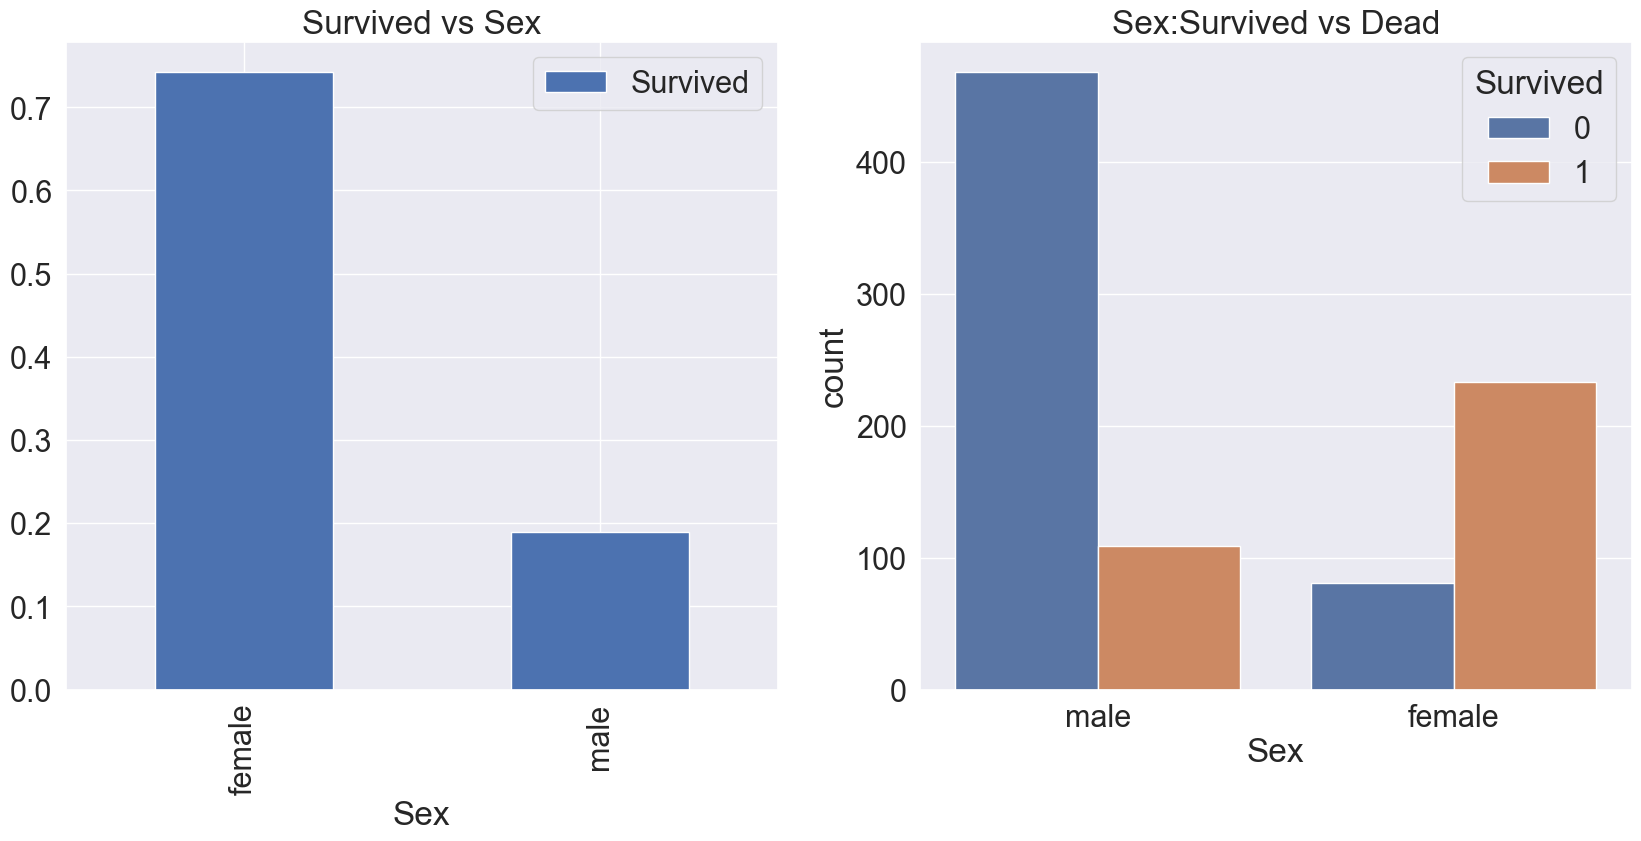

In [66]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [67]:
# Pclass -> Ordinal Feature

pd.crosstab(data.Pclass, data.Survived, 
            margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


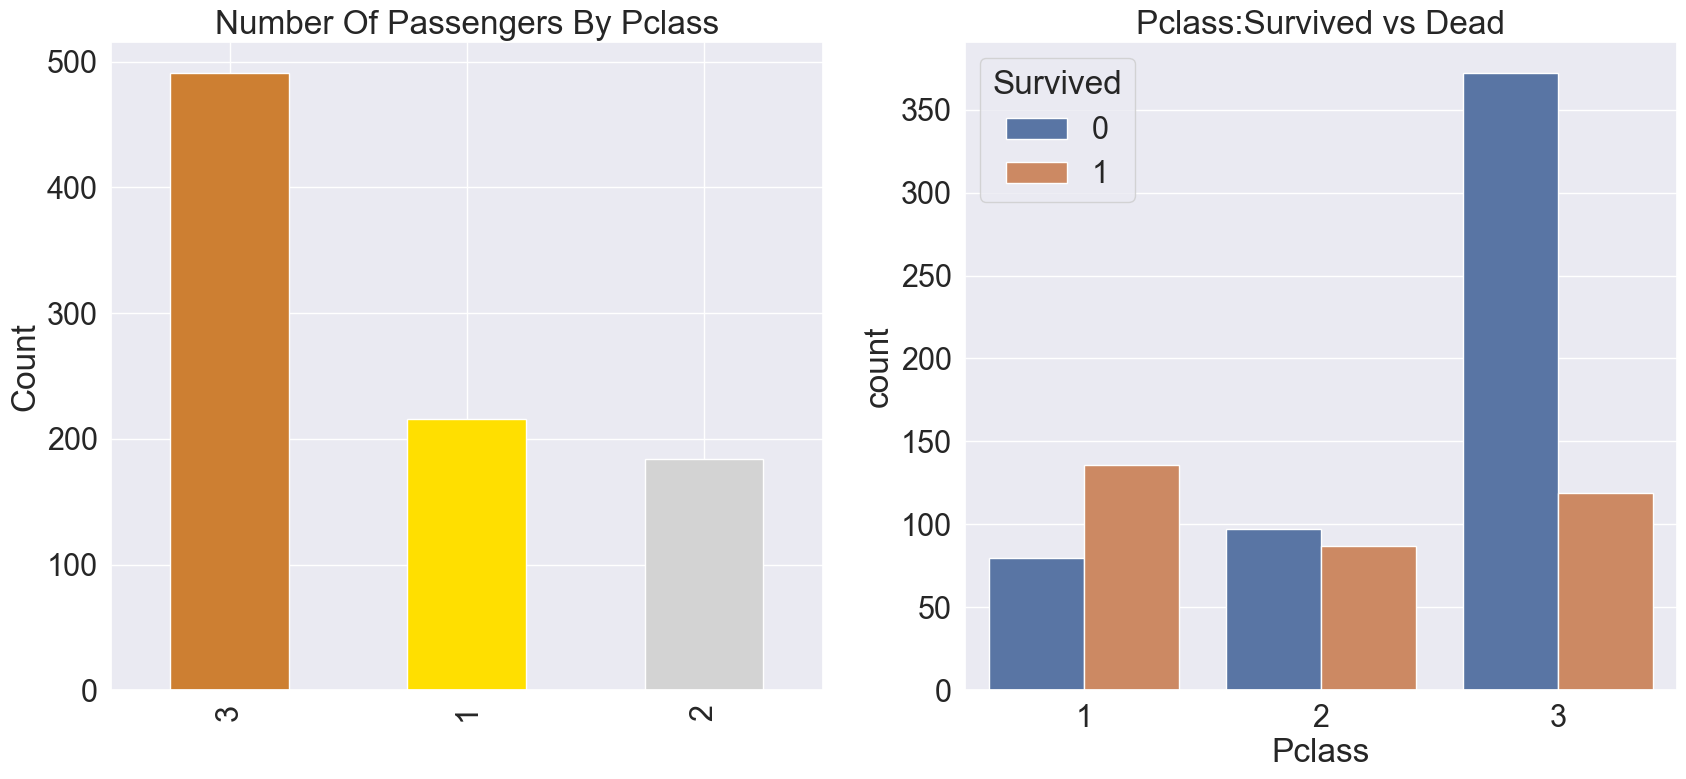

In [68]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', 
                                        '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


In [69]:
pd.crosstab([data['Sex'], data['Survived']], 
        data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

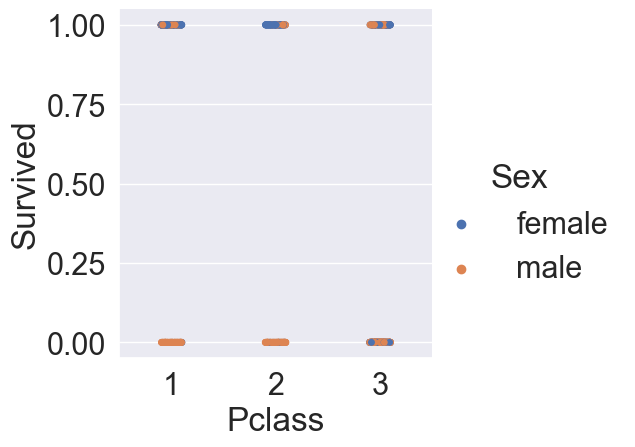

In [70]:
# (x축 데이터, y축 데이터, 범주, 데이터)
sns.catplot(x ='Pclass',y ='Survived', hue = 'Sex', data = data)
plt.show()
# 아래 그림의 막대기의 의미: error bar, error bar의 크기가 작을수록 신뢰도가 높다.

In [71]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [72]:
# describe 메소드를 사용하면 통계정보를 바로 알 수 있다.
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

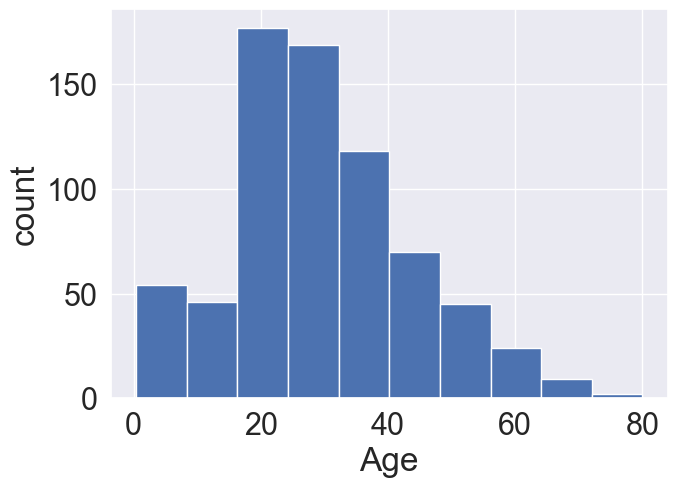

In [73]:
# 히스로그램은 주로 continuous한 정보를 파악할 때 사용한다.
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

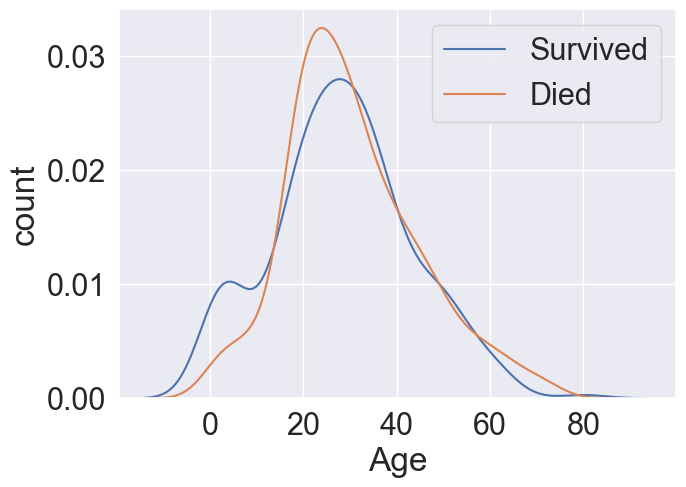

In [74]:
# 이진 분류의 경우 continuous 데이터를 파악할 때 활용
# 나이에 따라 생존 여부를 한눈에 파악하기
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label = 'Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label = 'Died')
# sns.kdeplot(data['Age'], hue = data['Survived'])
plt.legend() # 범례 표시를 위한 메소드
plt.xlabel('Age')
plt.ylabel('count')

In [75]:
#data[data['Survived'] == 1]['Age']
data.loc[data['Survived'] == 1, 'Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

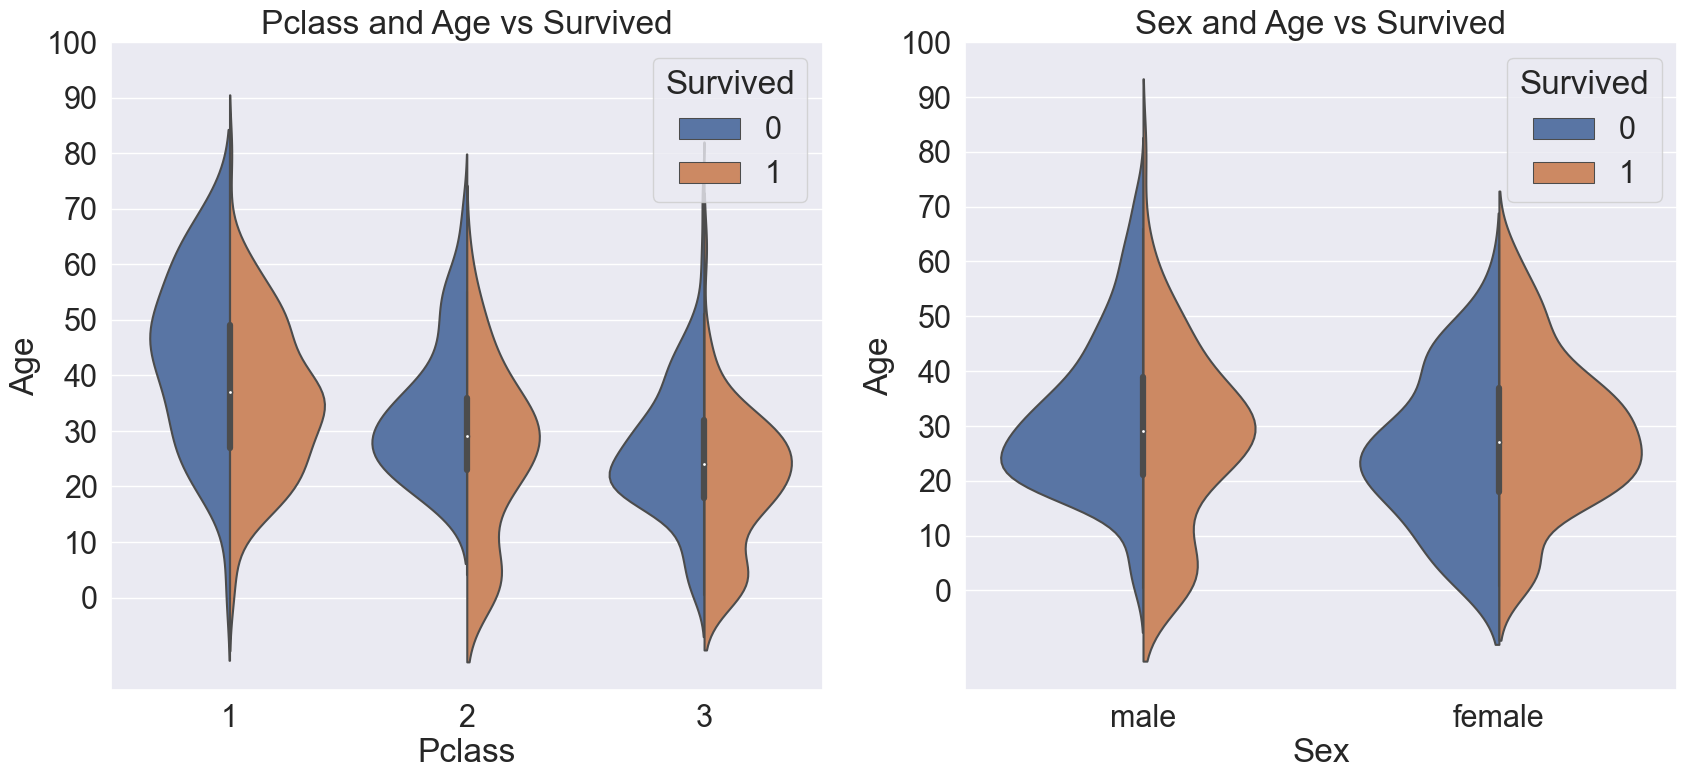

In [76]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x = 'Pclass',y = 'Age', hue = 'Survived', 
               data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x = 'Sex', y ='Age', hue = 'Survived', 
               data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [77]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [78]:
# data에 Initial 열 추가
data['Initial'] = 0

# extract메소드 정규표현식에 대한 것을 추출가능 문자에 .이 붙은 것을 추출
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    # 맨뒤에 점이 있고, 앞에 어떤 알파벳이든 매칭되는 문자를 추출한다.

In [79]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [80]:
# 바꾸기
# inplace = True 원본 데이터가 바뀐다.
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major',
   'Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
   'Other','Other','Mr','Mr','Mr'], inplace=True)

In [81]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [82]:
# Filling NaN Ages

# 각 그룹의 평균 값으로 빈 값을 채우기
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [83]:
data.isnull().sum()
# null 데이터가 있는지 없는지 알 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

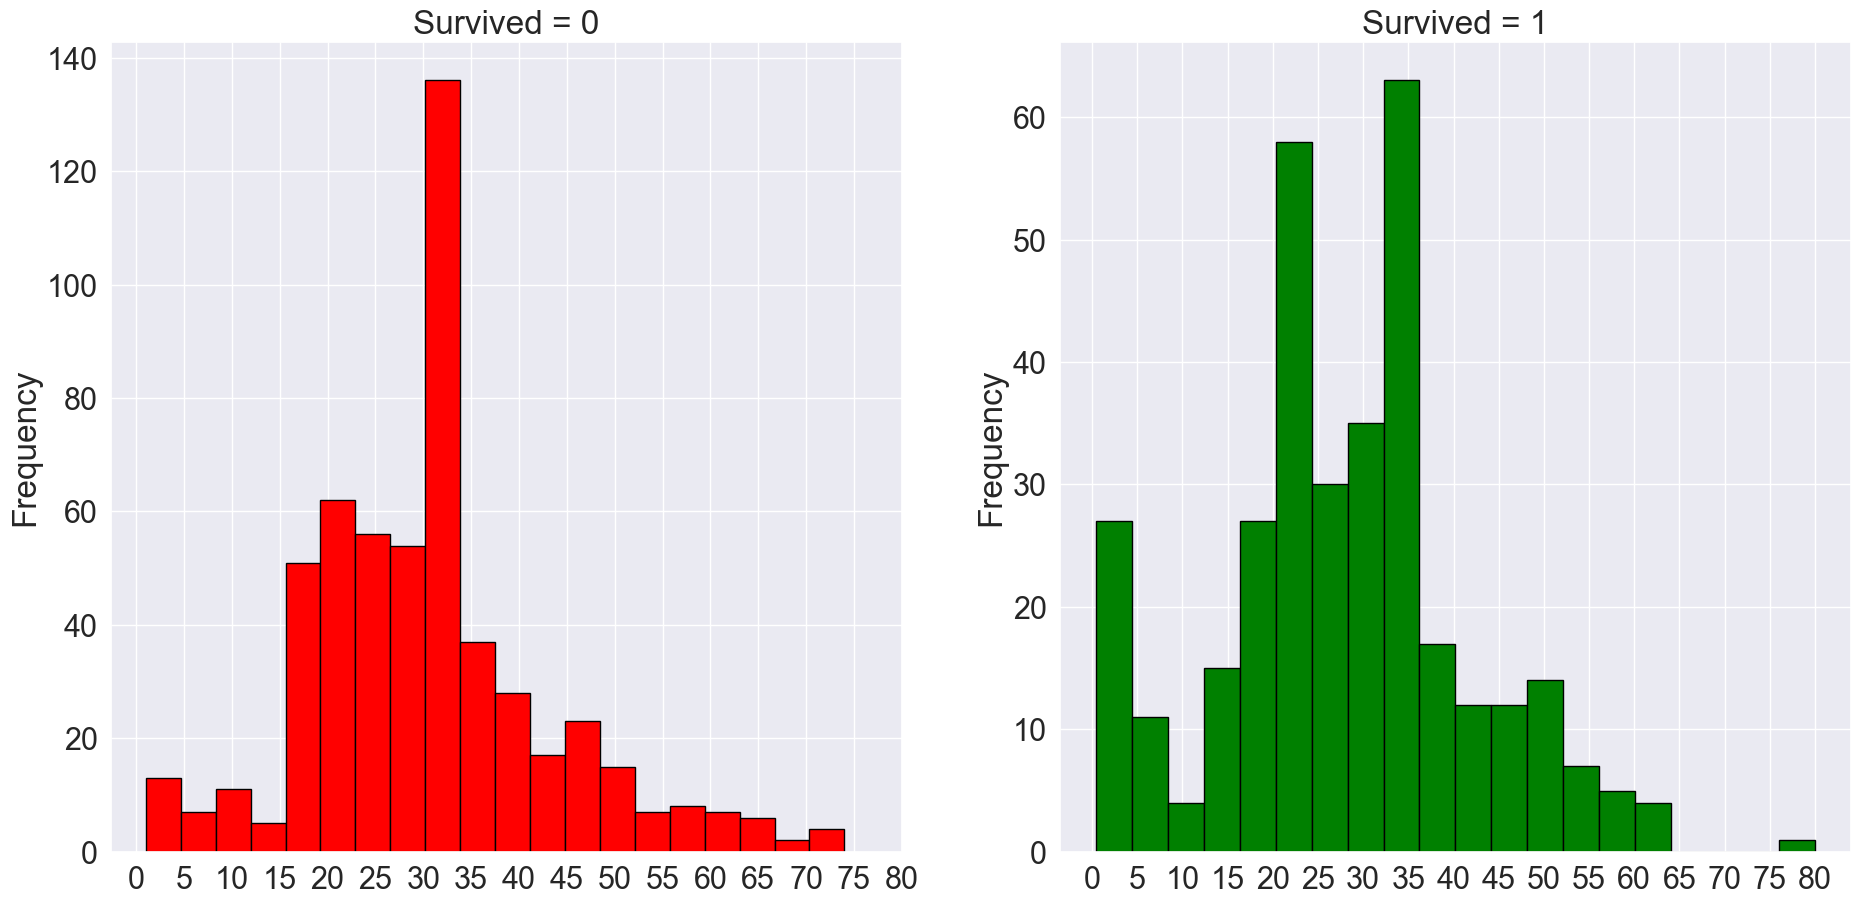

In [84]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data.loc[data['Survived'] == 0].Age.plot.hist(ax = ax[0], 
                bins = 20, edgecolor = 'black', color = 'red') # 20개로 나눈다.
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax = ax[1], 
                        color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

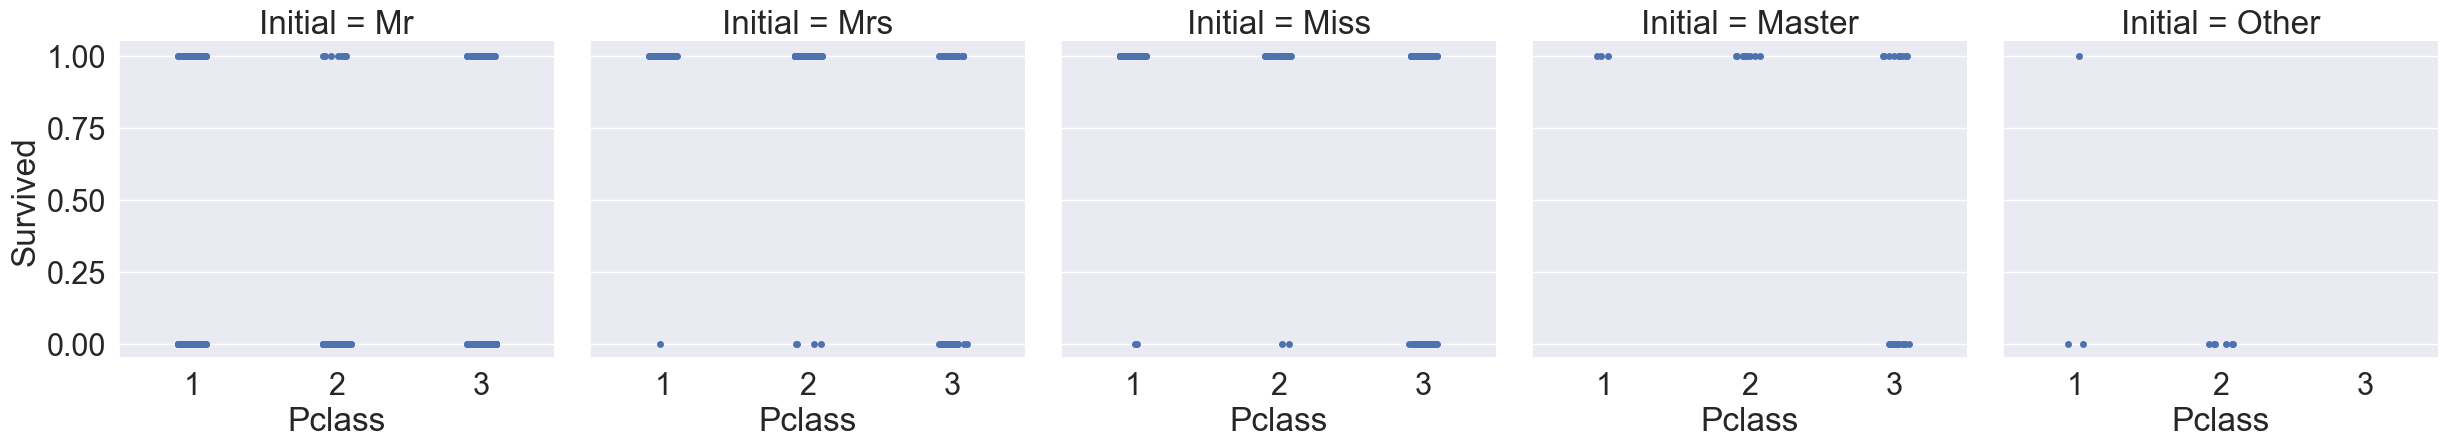

In [85]:
sns.catplot(x ='Pclass',y = 'Survived', col = 'Initial', data = data)
plt.show()

In [86]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins = True).style.background_gradient(cmap = 'summer_r')

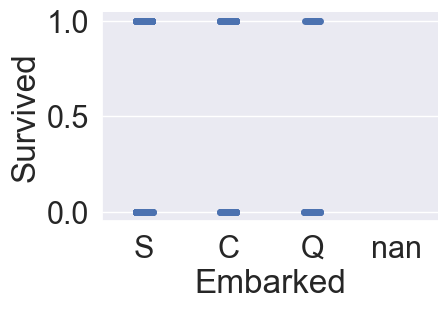

In [87]:
sns.catplot(x = 'Embarked',y = 'Survived', data = data)
fig = plt.gcf() # get current figure
fig.set_size_inches(5, 3)
plt.show()

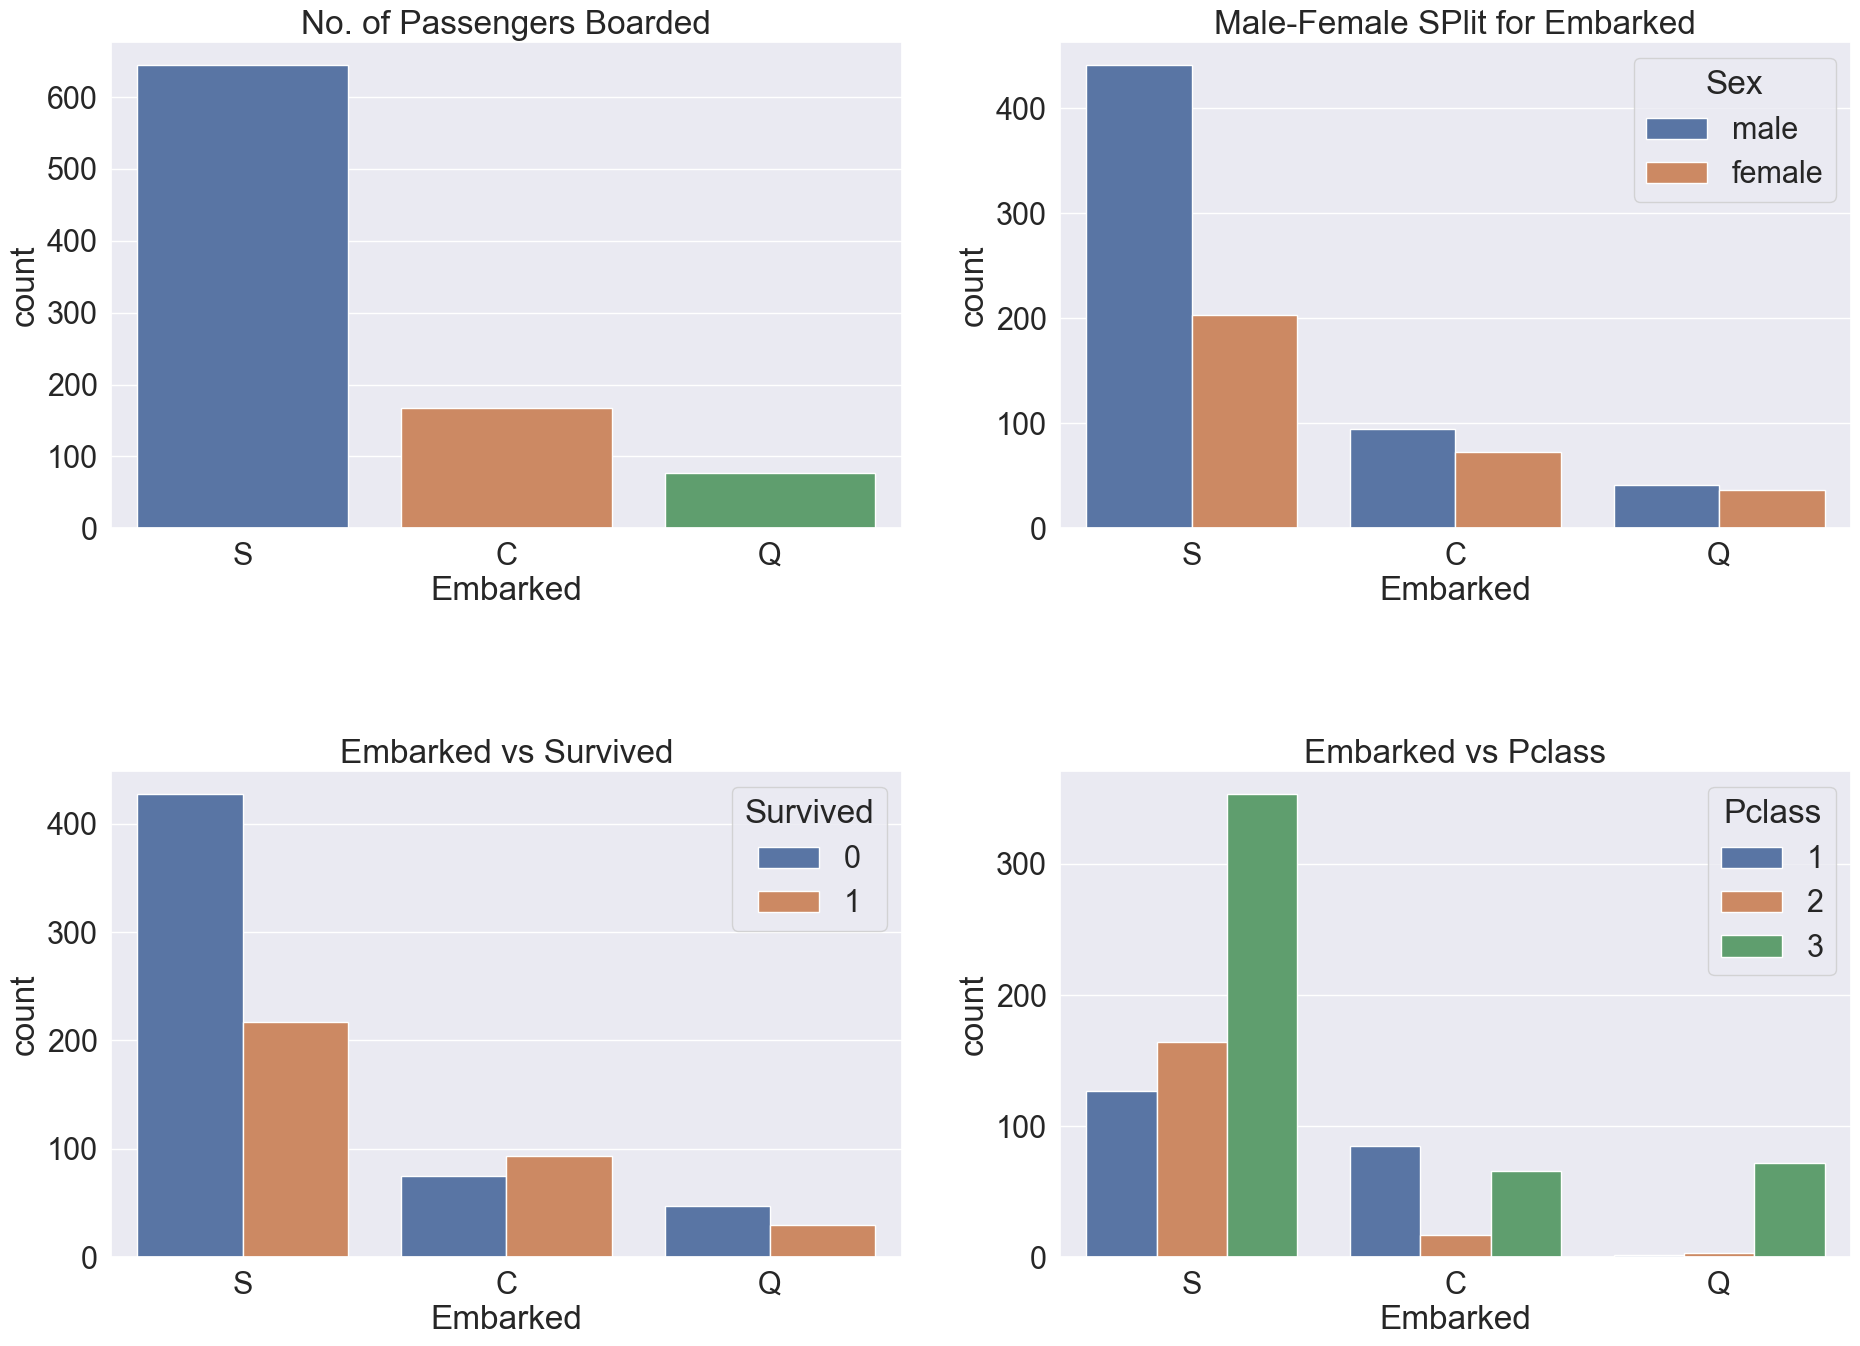

In [88]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot(x ='Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')
sns.countplot(x ='Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female SPlit for Embarked')
sns.countplot(x ='Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(x ='Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

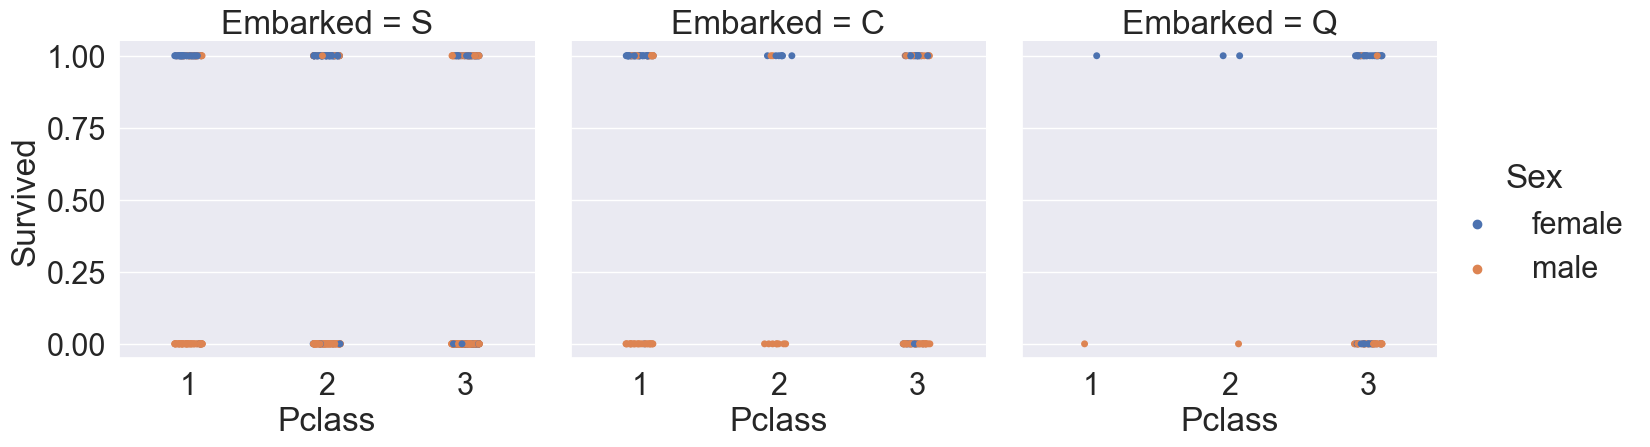

In [89]:
sns.catplot(x ='Pclass',y= 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

In [90]:
data['Embarked'].fillna('S', inplace = True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [91]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


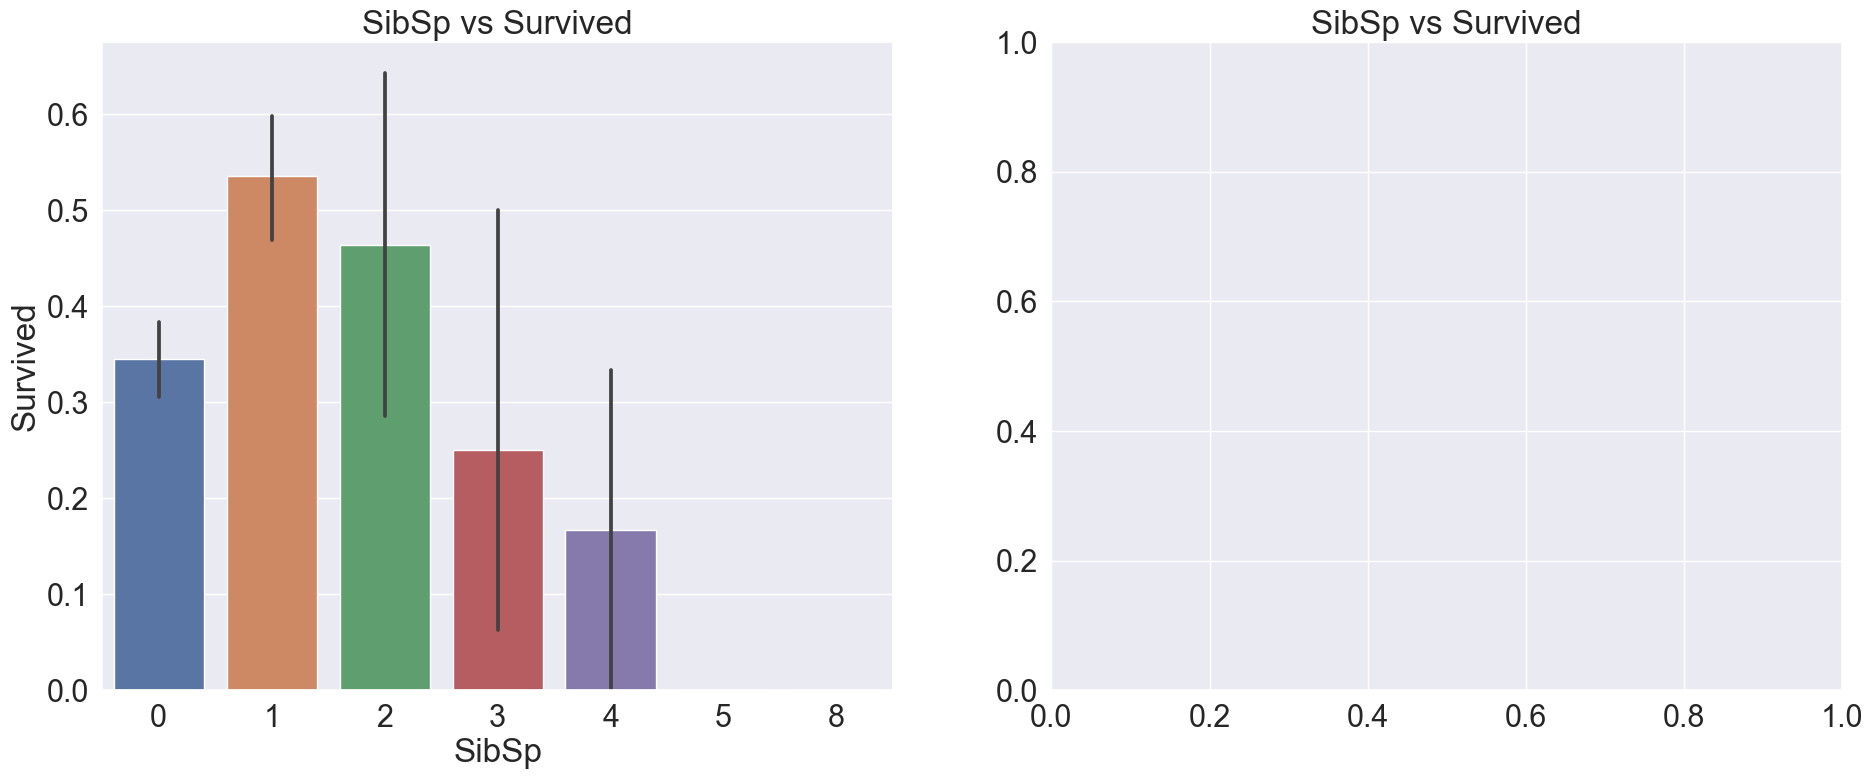

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x= 'SibSp',y ='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x ='SibSp',y = 'Survived',data=data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

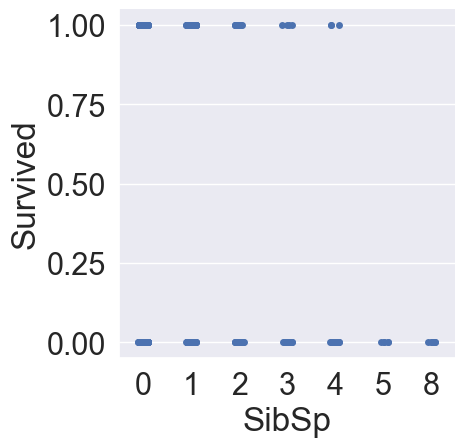

In [93]:
sns.catplot(x ='SibSp',y= 'Survived', data = data)

In [94]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [95]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


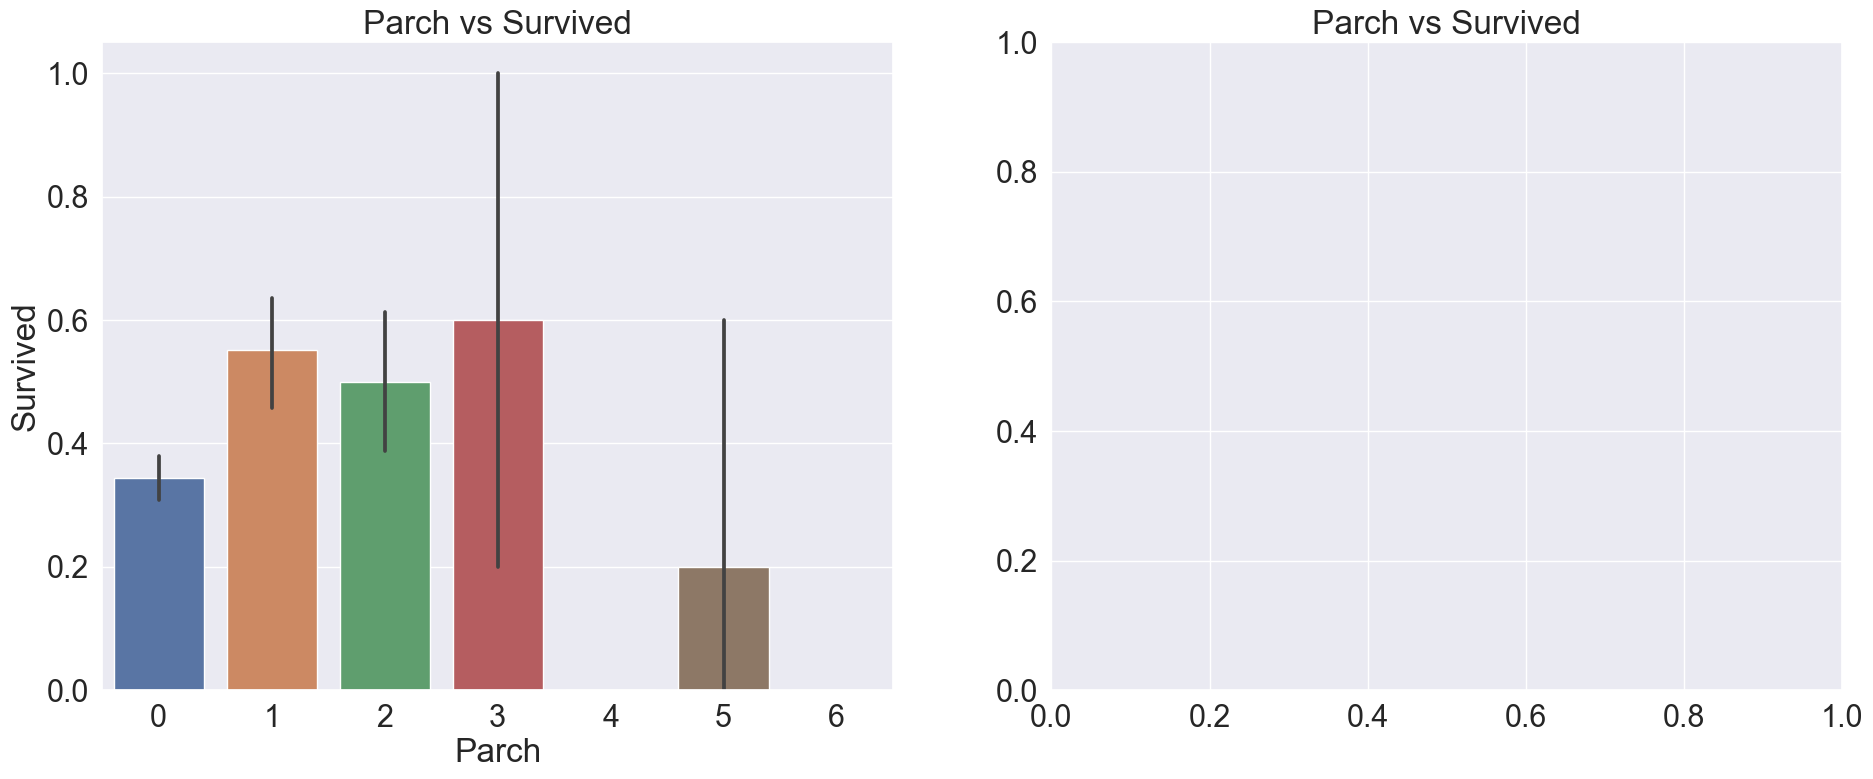

In [96]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(x ='Parch',y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x = 'Parch', y ='Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

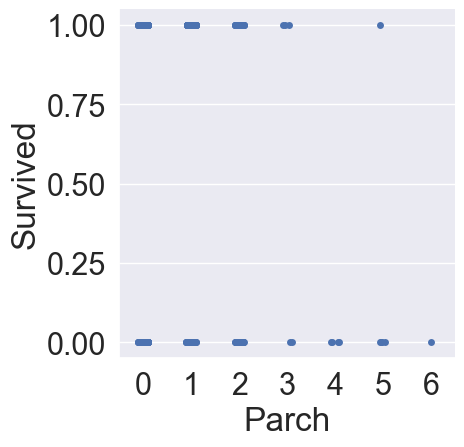

In [97]:
sns.catplot(x = 'Parch', y = 'Survived', data = data)